In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import BorderlineSMOTE

In [32]:
df = pd.read_csv("Encoder.csv")

## 🔀 Split Data and Apply SMOTE

In [34]:
X = df.drop('left', axis=1)
y = df['left']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

BLC = BorderlineSMOTE(sampling_strategy='minority', kind='borderline-1', random_state=42)

x_BLC, y_BLC = BLC.fit_resample(x_train, y_train)

D:\programs\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\programs\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\programs\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\programs\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\programs\anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, arg

# Baseline model

## 🧠 Train Logistic Regression

In [37]:
logReg = LogisticRegression(
    random_state=42
)

logReg.fit(x_BLC,y_BLC)

y_pred_test = logReg.predict(x_test)
y_pred_train = logReg.predict(x_train)

## 📊 Logistic Regression Accuracy

Test Accuracy : 0.7711546477699042
Train Accuracy : 0.7548999165971643


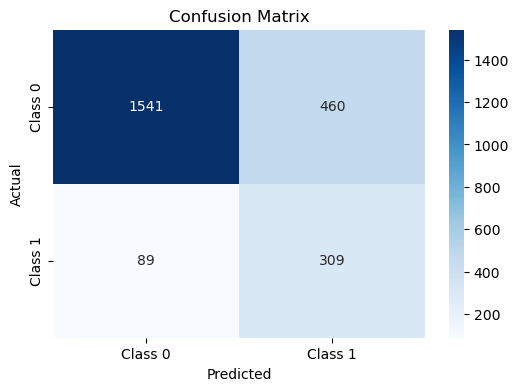


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      2001
           1       0.40      0.78      0.53       398

    accuracy                           0.77      2399
   macro avg       0.67      0.77      0.69      2399
weighted avg       0.86      0.77      0.80      2399



In [39]:
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

## 🧠 KNN 

In [41]:
knn = KNeighborsClassifier(
    n_neighbors=5
) 

knn.fit(x_train, y_train)

y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

## 📊 KNN Accuracy

Test Accuracy : 0.9508128386827845
Train Accuracy : 0.960696413678065


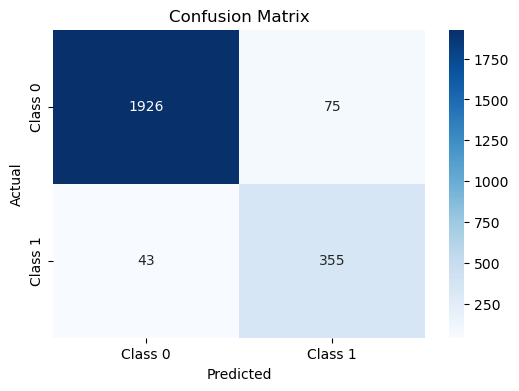


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.83      0.89      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.93      0.91      2399
weighted avg       0.95      0.95      0.95      2399



In [43]:
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

## 🧠 Train Random Forest

In [45]:
rf = RandomForestClassifier( 
    random_state=43
)

rf.fit(x_BLC, y_BLC)

y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

## 📊 Random Forest Accuracy

Test Accuracy : 0.9833263859941642
Train Accuracy : 1.0


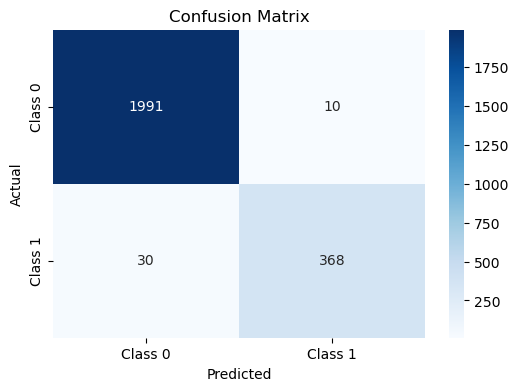


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.97      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [47]:
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

## 🧠 Train XGB

In [49]:
XGB = XGBClassifier(
    random_state=42
)

XGB.fit(x_BLC, y_BLC)

y_pred_test = XGB.predict(x_test)
y_pred_train = XGB.predict(x_train)

## 📊 XGB Accuracy

Test Accuracy : 0.9791579824927052
Train Accuracy : 0.994370308590492


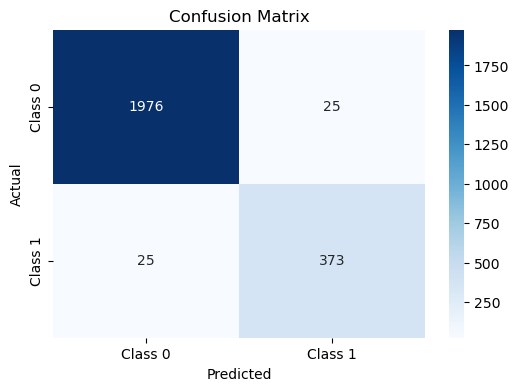


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.94      0.94      0.94       398

    accuracy                           0.98      2399
   macro avg       0.96      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [51]:
print(f'Test Accuracy : {accuracy_score(y_test , y_pred_test)}')
print(f'Train Accuracy : {accuracy_score(y_train , y_pred_train)}')

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# choosing model

## 📊 Logistic Regression Accuracy

Best parameters (Logistic Regression): {'C': 0.1}
Test Accuracy (Logistic Regression): 0.7711546477699042


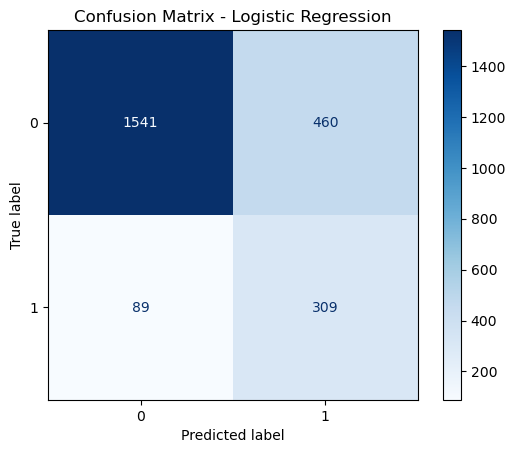


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      2001
           1       0.40      0.78      0.53       398

    accuracy                           0.77      2399
   macro avg       0.67      0.77      0.69      2399
weighted avg       0.86      0.77      0.80      2399



In [54]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, scoring='accuracy', cv=5)
grid_lr.fit(x_BLC, y_BLC)
print("Best parameters (Logistic Regression):", grid_lr.best_params_)

best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy (Logistic Regression):", acc_lr)

cm_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

## 📊 KNN Accuracy 

Best parameters (KNN): {'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy (KNN): 0.9345560650270947


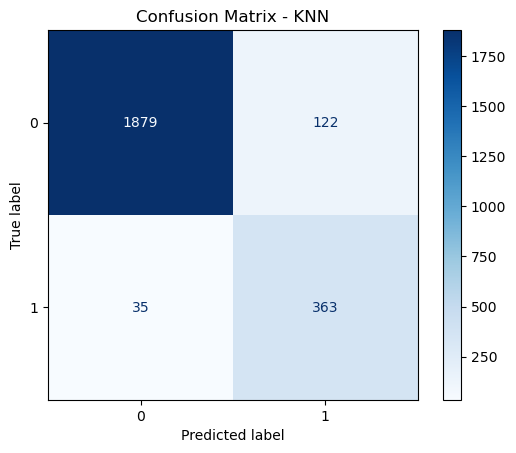


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      2001
           1       0.75      0.91      0.82       398

    accuracy                           0.93      2399
   macro avg       0.87      0.93      0.89      2399
weighted avg       0.94      0.93      0.94      2399



In [56]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=5)
grid_knn.fit(x_BLC, y_BLC)
print("Best parameters (KNN):", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy (KNN):", acc_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

## 📊 Random Forest Accuracy

Best parameters (Random Forest): {'max_depth': 20, 'n_estimators': 200}
Test Accuracy (Random Forest): 0.9824927052938724


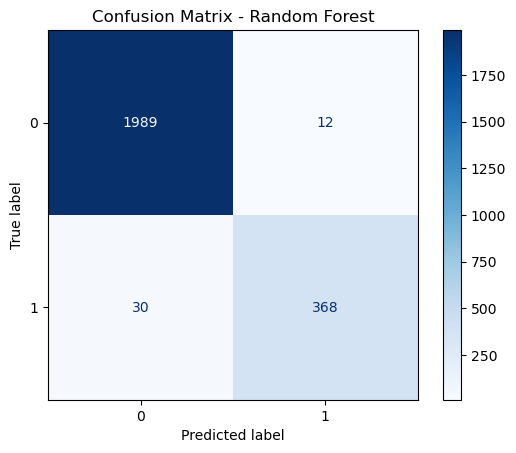


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [58]:
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=43), param_grid_rf, scoring='accuracy', cv=5)
grid_rf.fit(x_BLC, y_BLC)
print("Best parameters (Random Forest):", grid_rf.best_params_)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy (Random Forest):", acc_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

## 📊 XGB Accuracy

Best parameters (XGBoost): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Test Accuracy (XGBoost): 0.9779074614422676


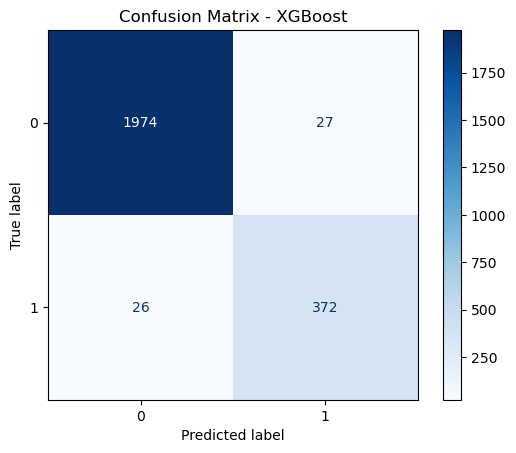


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.93      0.93      0.93       398

    accuracy                           0.98      2399
   macro avg       0.96      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [60]:
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42), param_grid_xgb, scoring='accuracy', cv=5)
grid_xgb.fit(x_BLC, y_BLC)
print("Best parameters (XGBoost):", grid_xgb.best_params_)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Test Accuracy (XGBoost):", acc_xgb)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

## 📊Pick the best model

In [82]:
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost']
accuracies = [acc_lr, acc_knn, acc_rf, acc_xgb]
best_params = [
    grid_lr.best_params_,
    grid_knn.best_params_,
    grid_rf.best_params_,
    grid_xgb.best_params_
]

best_index = np.argmax(accuracies)

print("🏆 Best Model:")
print("Model:", model_names[best_index])
print("Best Parameters:", best_params[best_index])
print(f"Accuracy: {accuracies[best_index]:.4f}")

🏆 Best Model:
Model: Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.9825
